In [84]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(rc = {"figure.figsize":(16, 9)})

In [179]:
def arr_delta(ht: np.array, print_arr=False):
    N, M = ht.shape

    teor_solution = np.zeros((N, M))
    h   = 1. / float(M - 1)
    tau = 1. / float(N - 1)

    for i in range(M):
        for j in range(N):
            teor_solution[j][i] =  np.sin(np.pi * i * h) * np.exp(-np.pi * np.pi * j * tau)
    
    # print(teor_solution)

    if print_arr:
        print("num solution\n" , ht)
        print("teor solution\n", teor_solution)
    return np.max(ht - teor_solution)

In [180]:
h100t100 = np.loadtxt( "build/h100t100.txt")
h200t200 = np.loadtxt( "build/h200t200.txt")
h300t300 = np.loadtxt( "build/h300t300.txt")
h400t400 = np.loadtxt( "build/h400t400.txt")
h500t500 = np.loadtxt( "build/h500t500.txt")

deltas = np.array([arr_delta(h100t100),
                   arr_delta(h200t200),
                   arr_delta(h300t300),
                   arr_delta(h400t400),
                   arr_delta(h500t500)])


hs = np.array([1./100.,1./200.,1./300.,1./400.,1./500.])

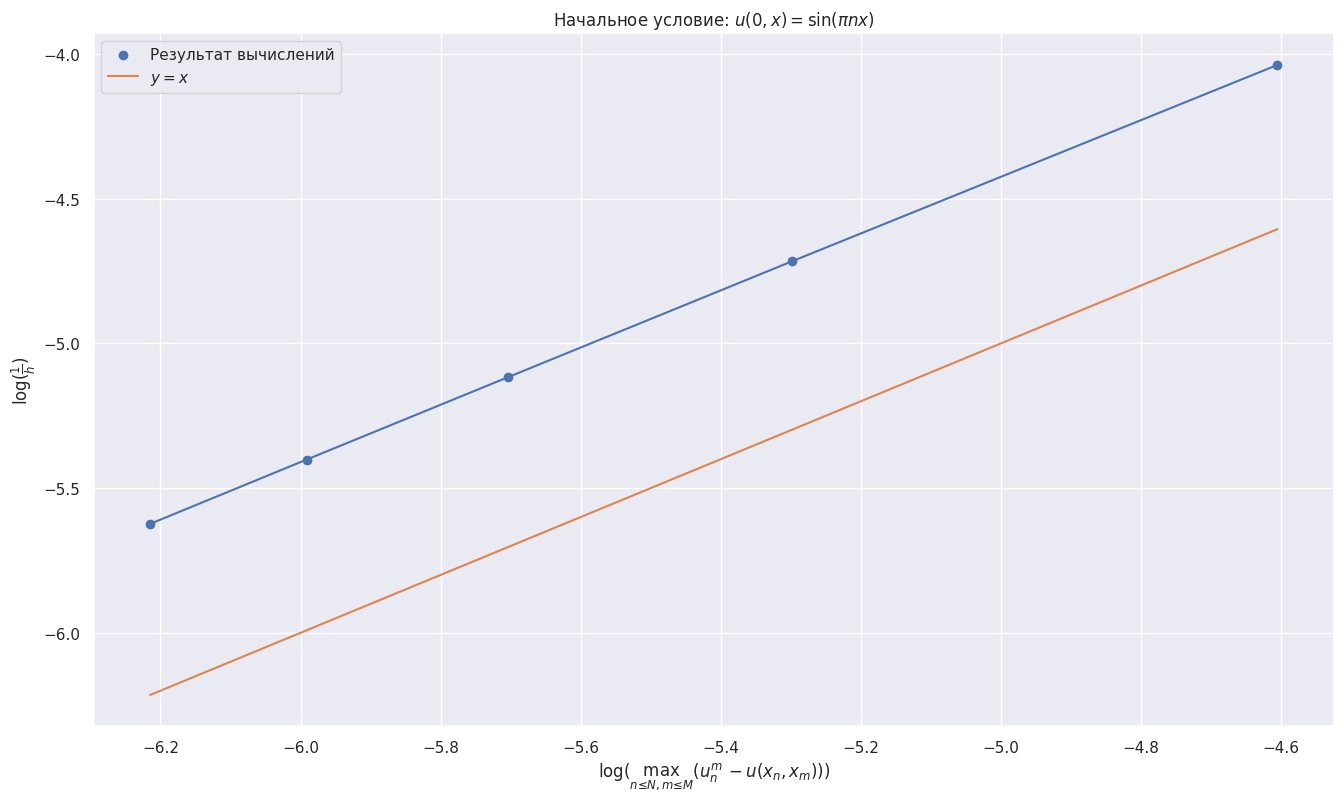

In [181]:
plt.plot(np.log(hs), np.log(deltas))
plt.scatter(np.log(hs), np.log(deltas), label="Результат вычислений")
plt.plot(np.log(hs), np.log(hs), label=r"$y=x$")
plt.title(r"Начальное условие: $u(0,x)=\sin(\pi n x) $")
plt.ylabel(r"$\log(\frac{1}{h})$")
plt.xlabel(r"$\log(\max_{n\leq N, m \leq M}(u_n^m - u(x_n, x_m)))$")
plt.legend()
plt.savefig("OrderCon1.pdf")

In [189]:
h10t100 = np.loadtxt( "build/h10t100.txt")
h20t400 = np.loadtxt( "build/h20t400.txt")
h30t900 = np.loadtxt( "build/h30t900.txt")
h100t10 = np.loadtxt( "build/h100t10.txt")
h10t10 = np.loadtxt( "build/h10t10.txt")


deltas = np.array([arr_delta(h10t100),
                   arr_delta(h20t400),
                   arr_delta(h30t900)])

ts = np.array([1./10.,1./20.,1./30.])

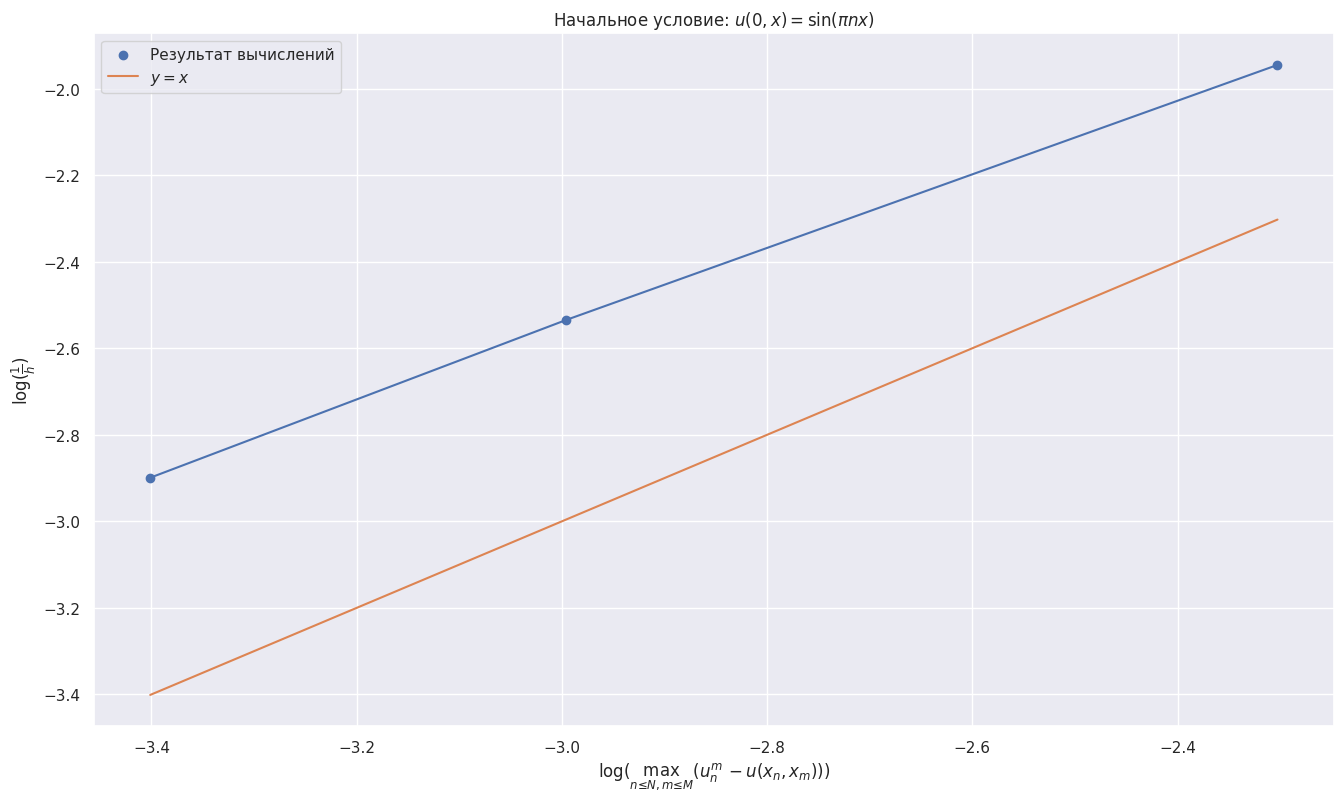

In [191]:
plt.plot(np.log(ts), np.log(deltas))
plt.scatter(np.log(ts), np.log(deltas), label="Результат вычислений")
plt.plot(np.log(ts), np.log(ts), label=r"$y=x$")
plt.title(r"Начальное условие: $u(0,x)=\sin(\pi n x) $")
plt.ylabel(r"$\log(\frac{1}{h})$")
plt.xlabel(r"$\log(\max_{n\leq N, m \leq M}(u_n^m - u(x_n, x_m)))$")
plt.legend()
plt.savefig("OrderCon2.pdf")

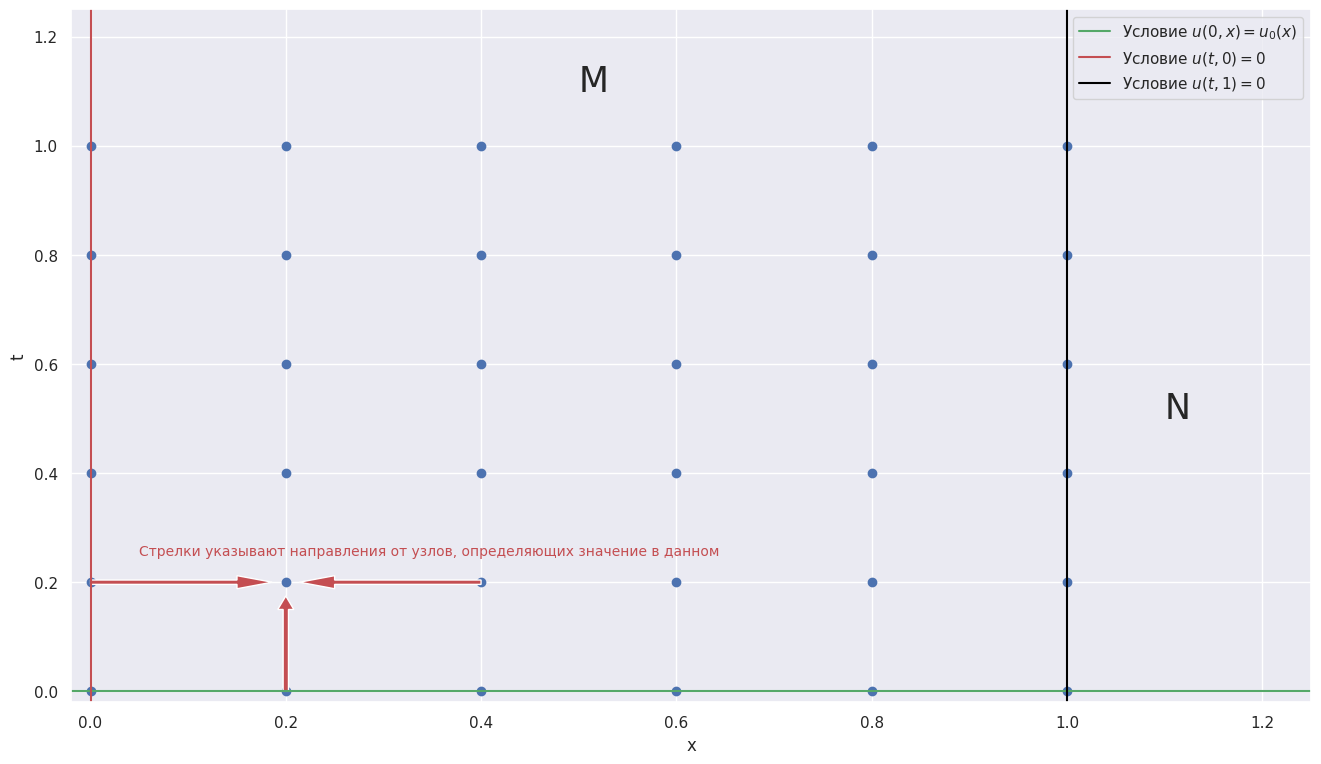

In [185]:
x = np.meshgrid(np.linspace(0, 1, 6), np.linspace(0, 1, 6))
y = np.vstack(list(map(np.ravel, x)))
plt.scatter(y[0], y[1])
plt.axhline (y=0, c="g",     label=r"Условие $u(0, x) = u_0(x)$")
plt.axvline (x=0, c="r",     label=r"Условие $u(t, 0) = 0$")
plt.axvline (x=1, c="black", label=r"Условие $u(t, 1) = 0$")
plt.text(0.5, 1.1, "M", fontsize=25)
plt.text(1.1, 0.5, "N", fontsize=25)
plt.arrow (x= 0 , y= 0.2 ,   dx= 0.15 ,  dy= 0.  , facecolor="r" ,  width= .008  )
plt.arrow (x= 0.2 , y= 0 ,   dx= 0. ,    dy= 0.15, facecolor="r" ,  width= .0055 )
plt.arrow (x= 0.4 , y= 0.2 , dx= -0.15 , dy= 0.  , facecolor="r" ,  width= .008  )
plt.text(0.05, 0.25, "Стрелки указывают направления от узлов, определяющих значение в данном", c="r",fontsize=10)
plt.xlabel("x")
plt.ylabel("t")
plt.xlim(-0.02, 1.25)
plt.ylim(-0.02, 1.25)
plt.legend()
plt.savefig("scheme.pdf")

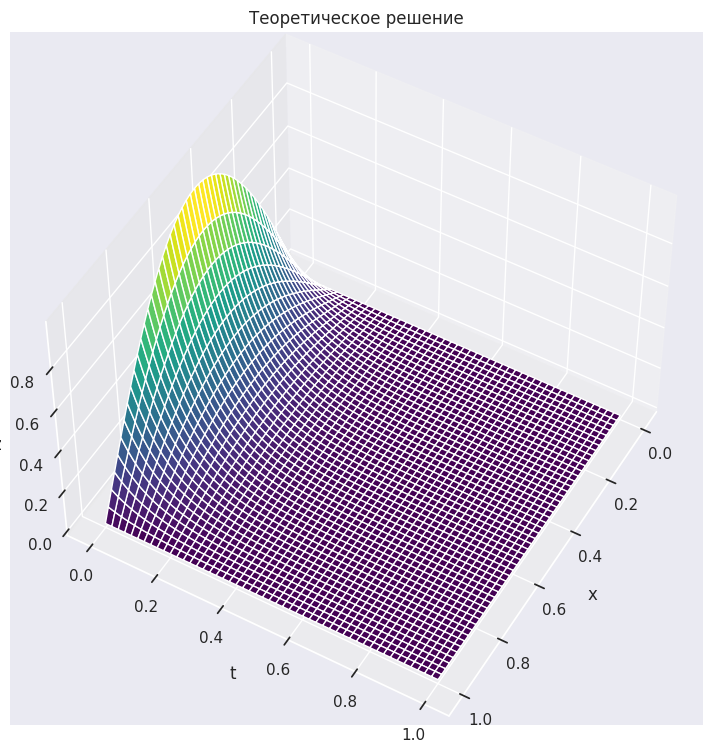

<Figure size 1600x900 with 0 Axes>

In [228]:
from mpl_toolkits.mplot3d import Axes3D

# Создаем данные для построения поверхности
x = np.linspace(0, 1, 1000)
t = np.linspace(0, 1, 1000)
x, t = np.meshgrid(x, t)
z = np.sin(np.pi * x) * np.exp(-np.pi * np.pi * t)

# Строим поверхность
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, t, z, cmap='viridis')

# Настройки осей и меток
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('z')
ax.set_title("Теоретическое решение")
ax.view_init(50, 30)
# Отображаем график
plt.show()
plt.savefig("TeorSolPict.pdf")

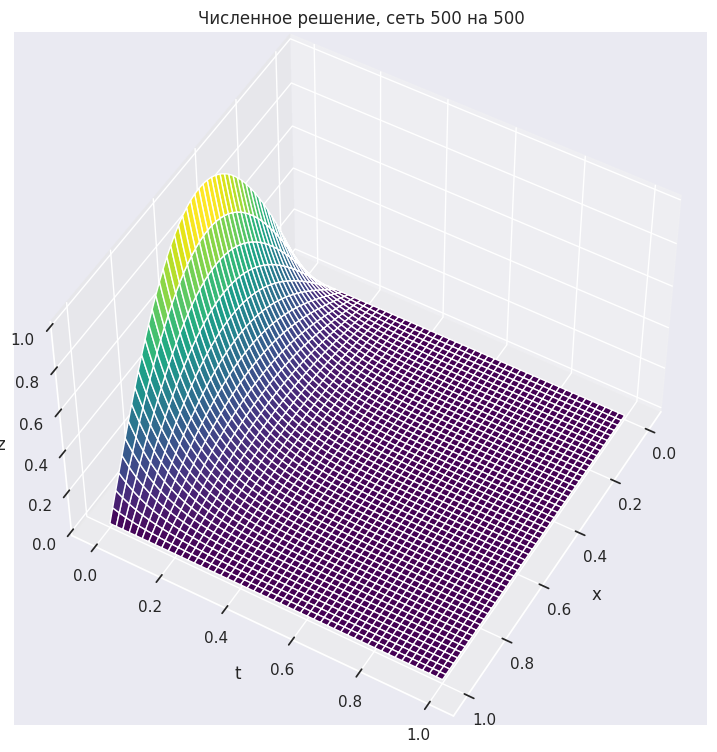

<Figure size 1600x900 with 0 Axes>

In [237]:
from mpl_toolkits.mplot3d import Axes3D

# Создаем данные для построения поверхности
x = np.linspace(0, 1, 500)
t = np.linspace(0, 1, 500)
x, t = np.meshgrid(x, t)
z  = np.loadtxt( "build/h500t500.txt")

# Строим поверхность
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, t, z, cmap='viridis')

# Настройки осей и меток
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('z')
ax.set_title("Численное решение, сеть 500 на 500")
ax.view_init(50, 30)
# Отображаем график
plt.show()
plt.savefig("TeorSolPict.pdf")

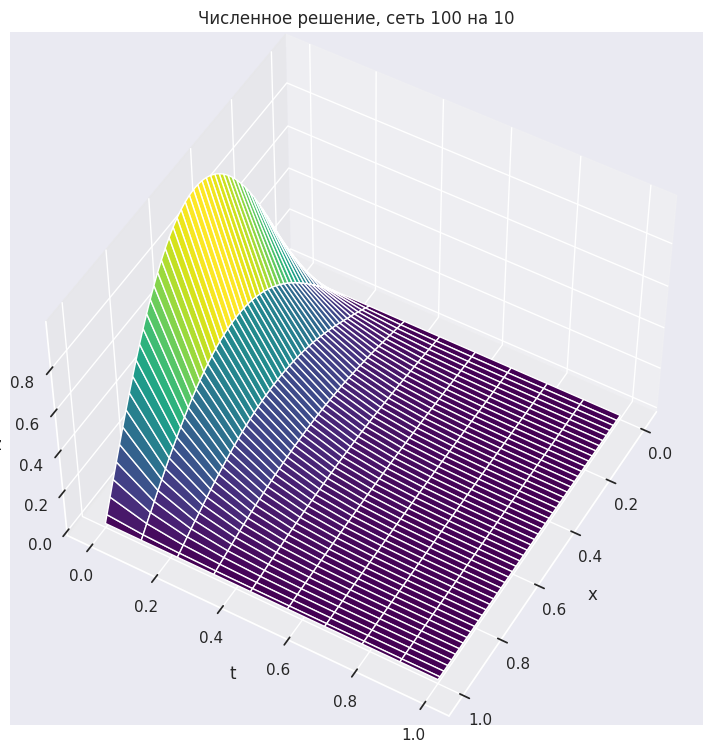

<Figure size 1600x900 with 0 Axes>

In [244]:
from mpl_toolkits.mplot3d import Axes3D

# Создаем данные для построения поверхности
t = np.linspace(0, 1, 10)
x = np.linspace(0, 1, 100)
x, t = np.meshgrid(x, t)
z  = np.loadtxt( "build/h10t100.txt")

# Строим поверхность
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, t, z, cmap='viridis')

# Настройки осей и меток
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('z')
ax.set_title("Численное решение, сеть 100 на 10")
ax.view_init(50, 30)
# Отображаем график
plt.show()
plt.savefig("TeorSolPict.pdf")

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (1000000,) and arg 2 with shape (250000,).

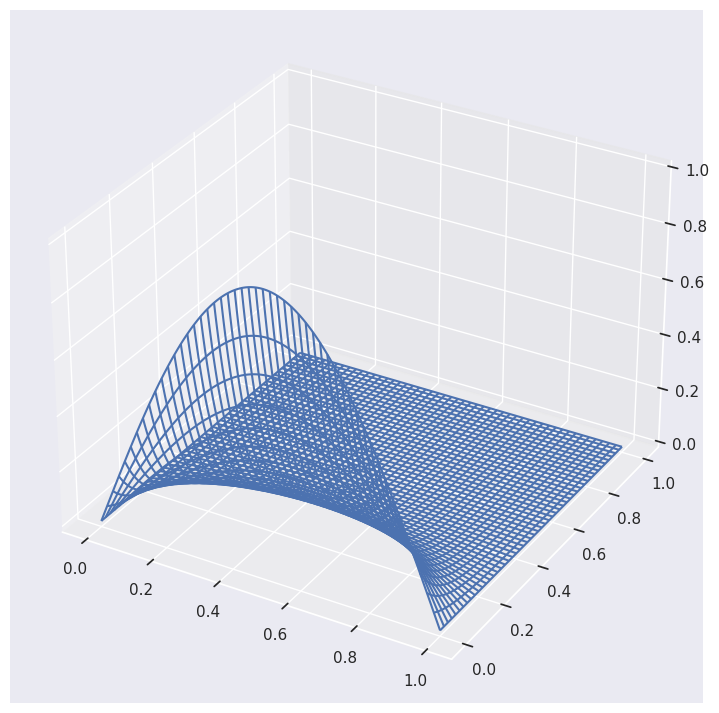

In [243]:
from mpl_toolkits.mplot3d import Axes3D

# Создаем данные для построения поверхности
x = np.linspace(0, 1, 500)
t = np.linspace(0, 1, 500)
x, t = np.meshgrid(x, t)
z  = np.loadtxt( "build/h500t500.txt")
x1 = np.linspace(0, 1, 1000)
t1 = np.linspace(0, 1, 1000)
x1, t1 = np.meshgrid(x1, t1)
z1 = np.sin(np.pi * x) * np.exp(-np.pi * np.pi * t)

# Строим поверхность
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(x, t, z, cmap='viridis')
ax.scatter(x1, t1, z1)

# Настройки осей и меток
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('z')
ax.set_title("Численное решение, сеть 500 на 500")
ax.view_init(50, 30)
# Отображаем график
plt.show()
plt.savefig("TeorSolPict.pdf")